In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs


#Ignore Warning 
import warnings as wrn
wrn.filterwarnings('ignore')

In [2]:
db= pd.read_csv('balance-scale.csv')
db.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [3]:
db.shape

(625, 5)

In [4]:
db.isnull().sum()

Class         0
L-Weight      0
L-Distance    0
R-Weight      0
R-Distance    0
dtype: int64

In [5]:
db.dtypes

Class         object
L-Weight       int64
L-Distance     int64
R-Weight       int64
R-Distance     int64
dtype: object

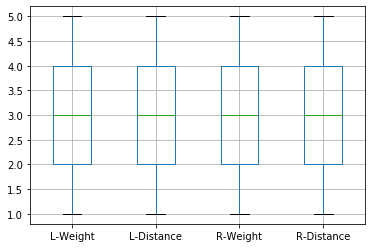

In [6]:
db.boxplot()

Label Encoding the 'Class' column so that heatmap can be plotted

In [7]:
db['Class'] = LabelEncoder().fit_transform(db['Class'].tolist())

In [8]:
db.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


# Visualization

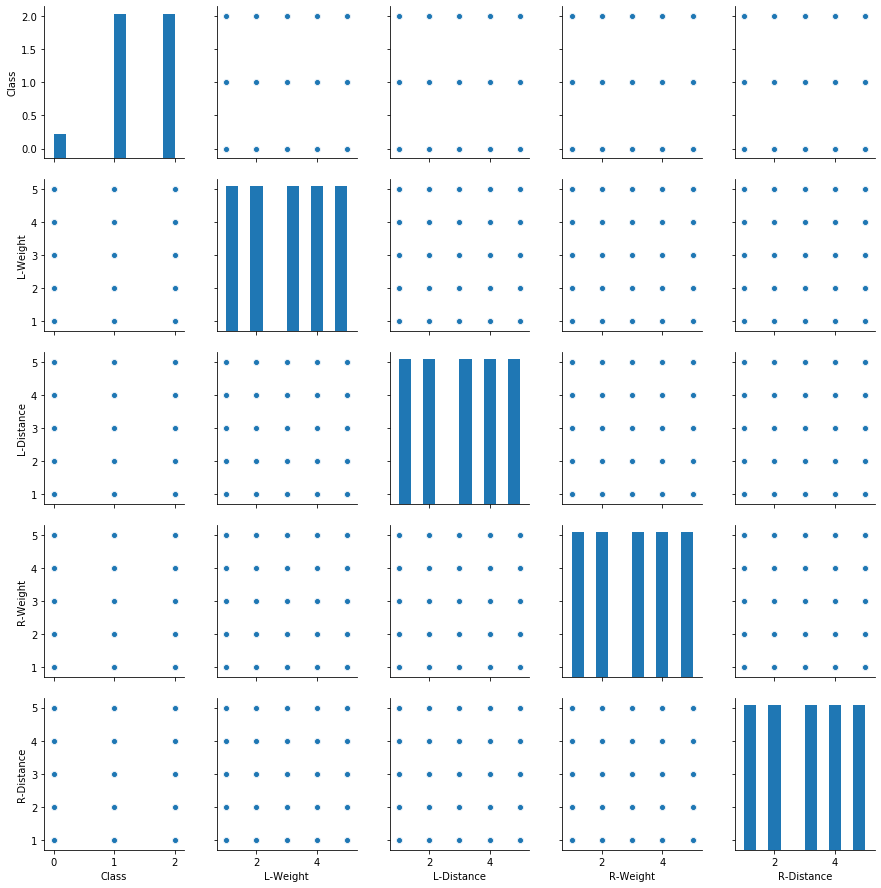

In [9]:
sns.pairplot(data=db)

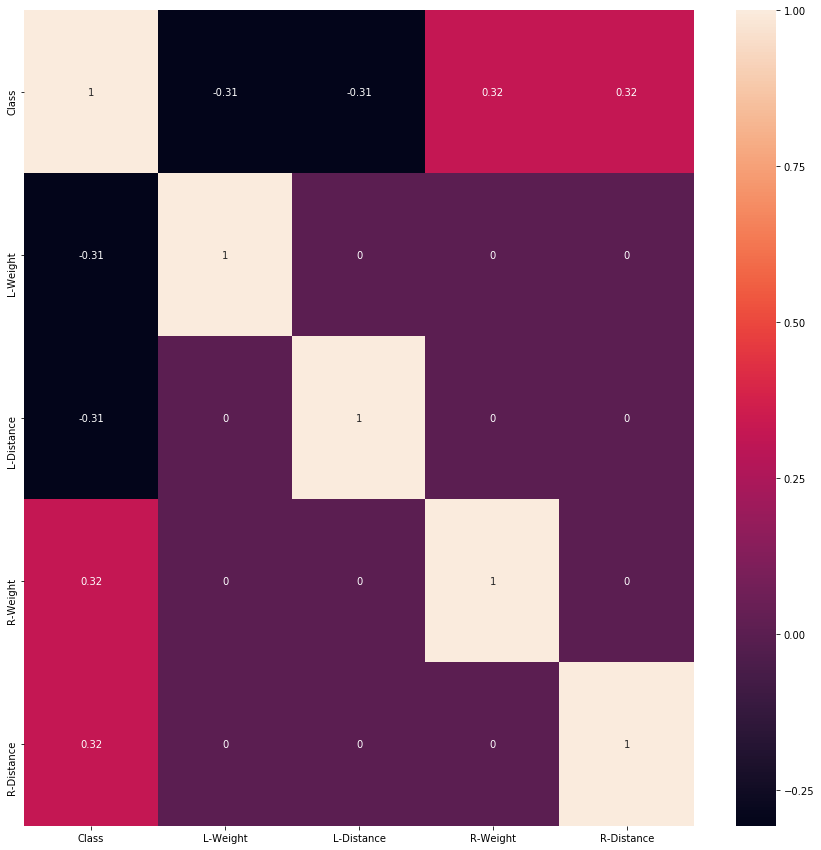

In [10]:
plt.figure(figsize= (15, 15))
sns.heatmap(db.corr(),annot=True)

In [11]:
db.corr()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
Class,1.000000,-0.306813,-0.306813,0.323056,0.323056
L-Weight,-0.306813,1.000000,0.000000,0.000000,0.000000
L-Distance,-0.306813,0.000000,1.000000,0.000000,0.000000
R-Weight,0.323056,0.000000,0.000000,1.000000,0.000000
R-Distance,0.323056,0.000000,0.000000,0.000000,1.000000


<Figure size 720x720 with 0 Axes>

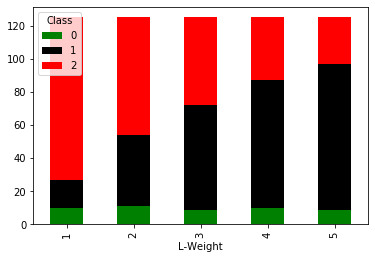

In [12]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(db['L-Weight'],db['Class'])
dfq.plot(kind='bar', stacked= True ,color =['green','black','red'],grid=False)

<Figure size 720x720 with 0 Axes>

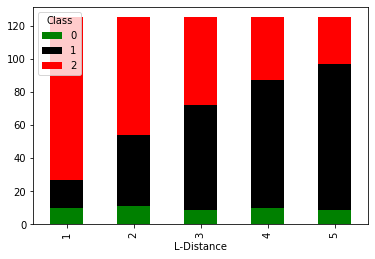

In [13]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(db['L-Distance'],db['Class'])
dfq.plot(kind='bar', stacked= True ,color =['green','black','red'],grid=False)

<Figure size 720x720 with 0 Axes>

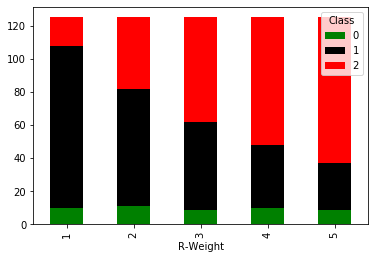

In [14]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(db['R-Weight'],db['Class'])
dfq.plot(kind='bar', stacked= True ,color =['green','black','red'],grid=False)

<Figure size 720x720 with 0 Axes>

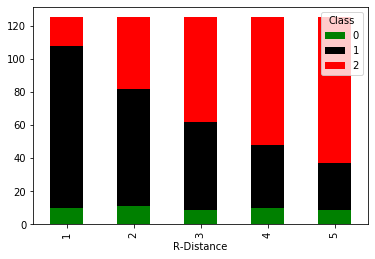

In [15]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(db['R-Distance'],db['Class'])
dfq.plot(kind='bar', stacked= True ,color =['green','black','red'],grid=False)

Conclusion : Plots show that the other attributes are equally correlated to Class.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C0E4438E48>,
      dtype=object)

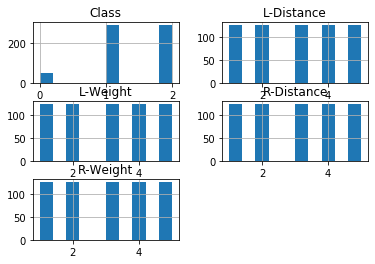

In [16]:
db.hist()

spliting dataset

In [17]:
X = db.drop(['Class'], axis = 1)
y = db[['Class']]
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20)

In [19]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [20]:
import math
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics.classification import confusion_matrix
from sklearn.metrics.classification import classification_report 

# 1.KNeighborsClassifier

In [21]:
#Classification and prediction

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy in percent = ',score(y_pred, y_test)*100)

Accuracy in percent =  90.0


In [22]:
y_pred = clf.predict(X_test)
print("Accuracy:")
print(accuracy_score(y_test, y_pred ))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred ))
print("Classification Report:")
print(classification_report(y_test, y_pred ))

Accuracy:
0.9
Confusion Matrix:
[[ 0  2  0]
 [ 0  8  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      1.00      0.89         8
           2       1.00      1.00      1.00        10

    accuracy                           0.90        20
   macro avg       0.60      0.67      0.63        20
weighted avg       0.82      0.90      0.86        20



## find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [23]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics.classification import accuracy_score
    from sklearn.metrics.classification import confusion_matrix
    #print(model,parameters)
    

    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True,scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, train_y_pred)
    test_conf = confusion_matrix (y_test, y_pred)
    train_conf = confusion_matrix (y_train, train_y_pred)
    
    class_report = classification_report(y_test,y_pred)
    y_pred_prob = grid.best_estimator_.predict_proba(X_test)[:,1]
    plt.hist(y_pred_prob,bins=10)
    plt.xlim(0,1)
    plt.xlabel("Predicted Proababilities")
    plt.ylabel("Frequency")
   
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_accuracy across ALL models:\n",
          train_acc)
                                    
    print("\n The test_accuracy across ALL models:\n",
          test_acc) 
    print("\n The train_confusion matrix across ALL models:\n",
          train_conf) 
    print("\n The test_confusion matrix across ALL models:\n",
          test_conf) 
    
    print("\n classification report across ALL models:\n",
          class_report) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

 The best score across ALL searched params:
 0.6923532336445174

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.5}

 The train_accuracy across ALL models:
 1.0

 The test_accuracy across ALL models:
 0.85

 The train_confusion matrix across ALL models:
 [[ 47   0   0]
 [  0 280   0]
 

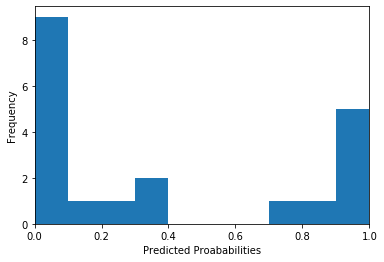

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best score across ALL searched params:
 0.6584045101404477

 The best parameters across ALL searched params:
 {'learning_rate': 0

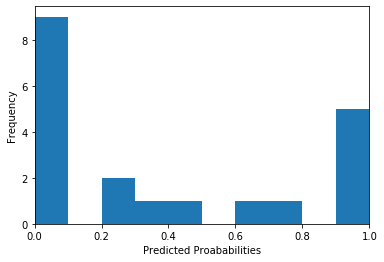

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.6144675337832965

 The best parameters across ALL searched params:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 3}

 The train_accuracy across ALL models:
 0.9024793388429752

 The test_accuracy across ALL models:
 0.8

 Th

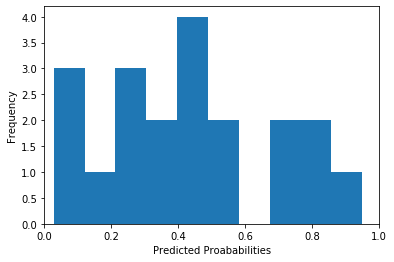

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 The best score across ALL searched params:
 0.8530234367582583

 The best parameters across ALL searched params:
 {'C': 1, 'kernel': 'linear'}

 The train_accuracy across ALL models:
 0.915702479338843

 The test_accuracy across ALL models:
 0.95

 The train_confusion matrix across ALL models:
 [[ 43   2   2]
 [ 20 256   4]
 [ 19   4 255]]

 The test_confusion matrix across ALL models:
 [[2 0 0]
 [0 8 0]
 [1 0 9]]

 classification report across ALL models:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
          

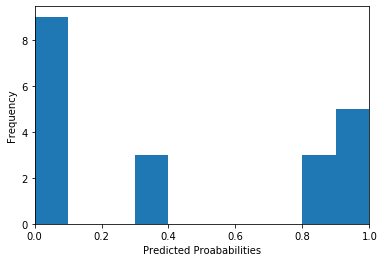

None



In [24]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
alg = [XGBClassifier(),GradientBoostingClassifier(), RandomForestClassifier(),SVC(probability=True)]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              { 'max_depth'    : [4,6,8],
                  'min_samples_split' : [2,3,4],
                  'max_features'    : ['auto','sqrt','log2']},
              
              {'kernel':['linear', 'rbf'], 
                'C':[1, 10]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

here , we can see that the SVC model has best score and their actual and predicted probability values are nearby same as campare to other models..

### bar plot of features importances

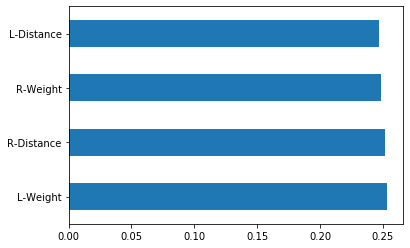

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

here,all features are important for model.

## save model

In [20]:
import pickle

In [21]:
filename='balance-scale-intervention_GradientBoostingRegressor_model.sav'

In [22]:
pickle.dump(model, open(filename, 'wb'))

In [23]:
load_lr_model =pickle.load(open(filename, 'rb'))